<a href="https://colab.research.google.com/github/SoheilBadri2000/DataScience1/blob/main/8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overfitting - Regularization in Regression

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.model_selection import cross_val_score

import warnings

In [ ]:
# plotting setup
plt.figure(figsize=(20,10), dpi=150)
plt.style.use("Solarize_Light2")
np.random.seed(42)
np.set_printoptions(precision=2, linewidth=50)

<Figure size 3000x1500 with 0 Axes>

In [ ]:
# Generate data
def f(x):
  return 0.2 + np.cos(8 * (x - 1))

def generate_data(n_samples=100):
  x = np.sort(np.random.rand(n_samples)) # 0.1, 0.2, 0.4, 0.03, 0.12,
  y = f(x) + 0.3 * np.random.randn(n_samples)
  return x, y

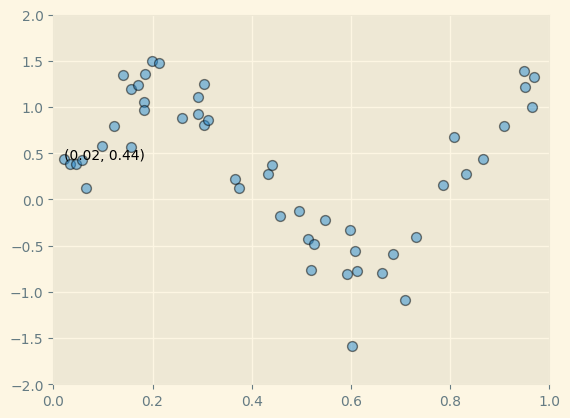

In [ ]:
n_samples = 50 # number of data samples
x, y = generate_data(n_samples)

# plot data
plt.figure()
plt.scatter(x, y, s=50, edgecolors='k', alpha=0.5, cmap=plt.cm.coolwarm)
plt.text(x[0], y[0], "(" + str(np.round(x[0], 2)) + ", " + str(np.round(y[0], 2)) + ")")
plt.xlim(0, 1)
plt.ylim(-2, 2)
plt.show()

# Polynomial Regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
def fit_poly(x, y, deg=1):
  # add polynomial features
  polynomial_features = PolynomialFeatures(degree=deg)
  # create and fit model
  linear_regression = LinearRegression()
  model = Pipeline([("poly_feat", polynomial_features), ("lin_reg", linear_regression)])
  model.fit(x[:, None], y)
  return model

In [ ]:
degrees = [1, 3, 5, 7, 10, 20]

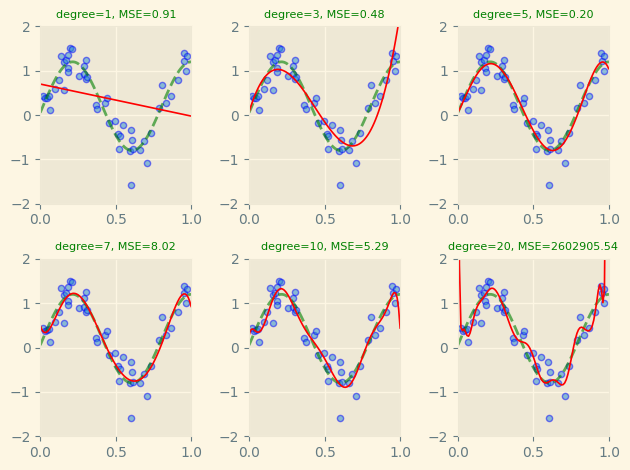

In [ ]:
plt.figure()
for d in degrees:
  model = fit_poly(x, y, deg=d)
  scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

  # plot data and model
  plt.subplot(2, 3, degrees.index(d) + 1)
  plt.tight_layout()

  x_test = np.linspace(0, 1, 100)
  plt.plot(x_test, f(x_test), 'g--', label="Target", alpha=0.6)
  plt.scatter(x, y, s=20, edgecolor='b', alpha=0.5, label="Samples")
  plt.plot(x_test, model.predict(x_test[:, None]), 'r', lw=1.2, label="Predicted")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.title("degree={}, MSE={:.2f}".format(d, -scores.mean()), fontsize=8, color="green")

plt.show()

In [ ]:
def plot_coef(weight):
  plt.figure()
  plt.bar(np.arange(1, len(weight)+1), height=np.abs(weight), color='g')
  plt.show()

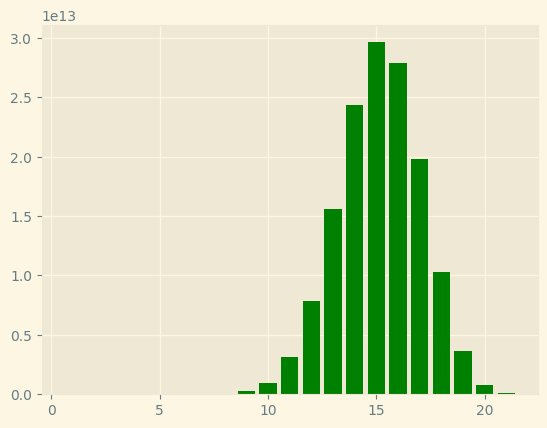

In [ ]:
plot_coef(model.steps[1][1].coef_)

# L2-Regularization (Ridge)

In [ ]:
def fit_poly_L2_reg(degree=1, lmbda=1.0):
  # add polynomial features
  polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
  # create and fit the model
  L2_regression = Ridge(alpha=lmbda)
  model = Pipeline([("polynomial_features", polynomial_features), ("L2_regression", L2_regression)])
  model.fit(x[:, None], y)
  return model

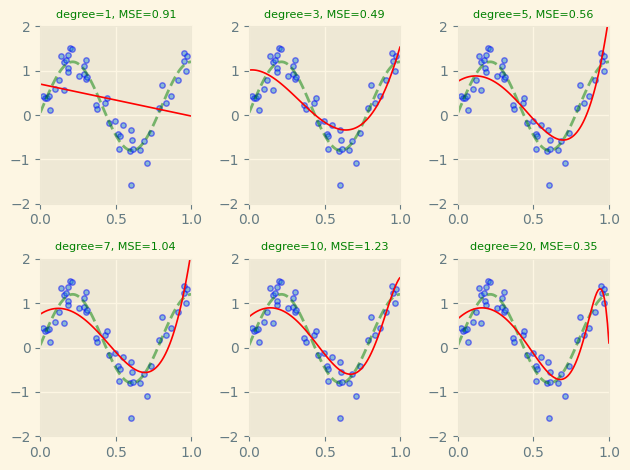

In [ ]:
lmbda = 0.01
plt.figure()
for d in degrees:
  model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
  scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

  # plot data and model
  plt.subplot(2, 3, degrees.index(d) + 1)
  plt.tight_layout()

  x_test = np.linspace(0, 1, 100)
  plt.plot(x_test, f(x_test), 'g--', label="Target", alpha=0.5)
  plt.scatter(x, y, s=15, edgecolor='b', alpha=0.5, label="Samples")
  plt.plot(x_test, model.predict(x_test[:, None]), 'r', lw=1.2, label="Predicted")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.title("degree={}, MSE={:.2f}".format(d, -scores.mean()), fontsize=8, color="green")

plt.show()

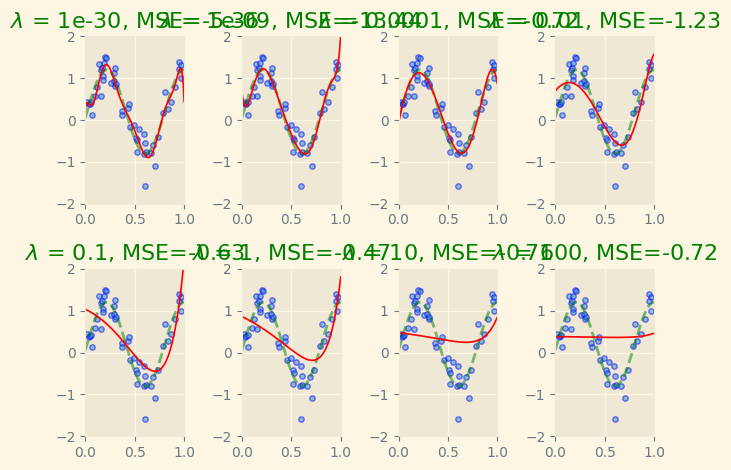

In [ ]:
# The effect of lambda analysis for L2
lmbdas = [1e-30, 1e-9, 1e-4, 1e-2, 1e-1, 1, 10, 100]
plt.figure()
d = 10
for lmbda in lmbdas:
  model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
  scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

  # plot data and model
  plt.subplot(2, 4, lmbdas.index(lmbda)+1)
  plt.tight_layout()
  x_test = np.linspace(0, 1, 100)
  plt.plot(x_test, f(x_test), 'g--', label="Target", alpha=0.5)
  plt.scatter(x, y, s=15, edgecolor='b', alpha=0.5, label="Samples")
  plt.plot(x_test, model.predict(x_test[:, None]), 'r', lw=1.2, label="Predicted")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.title("$\lambda$ = {}, MSE={:.2f}".format(lmbda, scores.mean()), color="green")

plt.show()

Text(0.5, 1.0, 'degree = 20, $\\lambda$ = 0.0001, Loss (MSE) = 6.32')

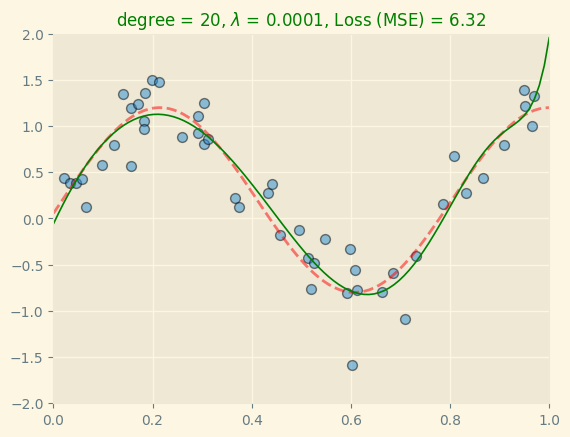

In [ ]:
d = 20
lmbda = 1e-4 #0.0001

# fir
model = fit_poly_L2_reg(degree=d, lmbda=lmbda)
scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig, ax = plt.subplots(1)

x_test = np.linspace(0, 1, 100)
ax.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
ax.scatter(x, y, s=50, edgecolor='k', alpha=0.5, label="Samples")
ax.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.set_title("degree = %d, $\lambda$ = %s, Loss (MSE) = %.2f" % (d, lmbda, -scores.mean()), fontsize=12, color="green")

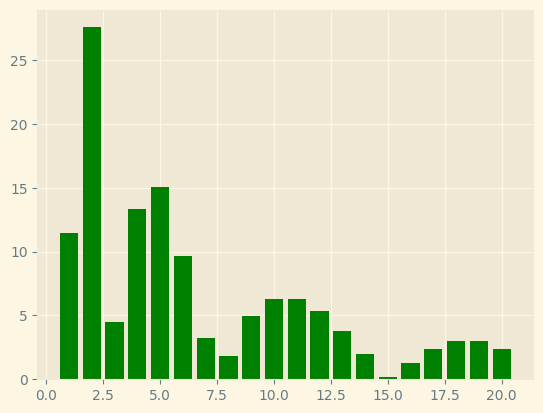

In [ ]:
plot_coef(model.steps[1][1].coef_)

# L1-Regularization (Lasso)

In [ ]:
def fit_poly_L1_reg(degree=1, lmbda=0.1):

  # add polynomial features up to degree
  polynomial_features = PolynomialFeatures(degree=degree)
  L1_regression = Lasso(alpha=lmbda)
  model = Pipeline([("poly", polynomial_features), ("L1_reg", L1_regression)])

  # create and fit model
  model.fit(x[:, None], y)
  return model

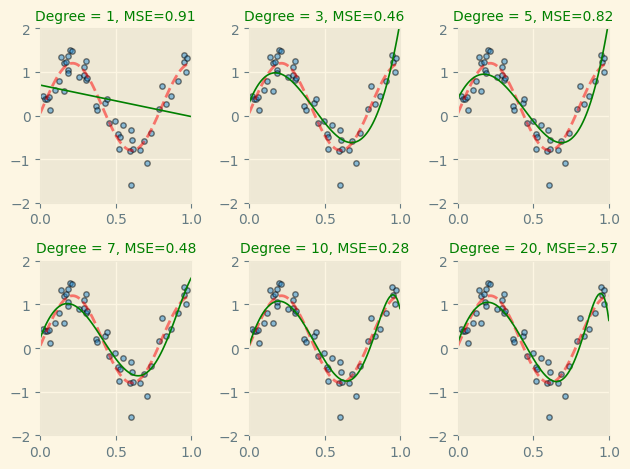

In [ ]:
lmbda = 1e-4
plt.figure()

for d in degrees:
  model = fit_poly_L1_reg(degree=d, lmbda=lmbda)
  scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

  # plot data and model
  plt.subplot(2, 3, degrees.index(d)+1)
  plt.tight_layout()
  x_test = np.linspace(0, 1, 100)
  plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
  plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
  plt.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.title("Degree = {}, MSE={:.2f}".format(d, -scores.mean()), fontsize=10, color="green")

warnings.filterwarnings(action="ignore")
plt.show();

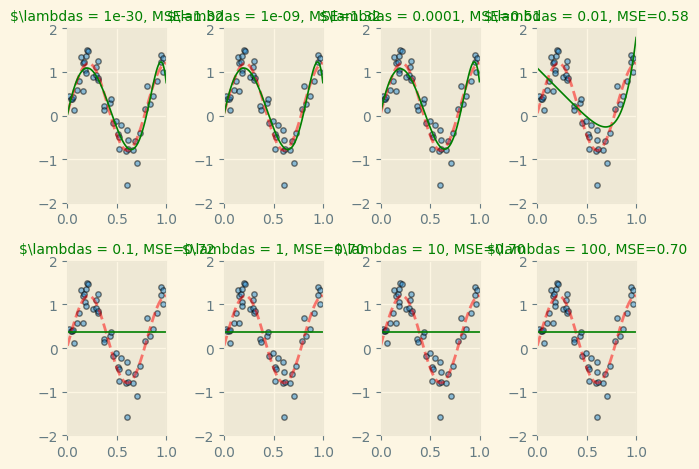

In [ ]:
# The effect of lambda analysis for L2
lmbdas = [1e-30, 1e-9, 1e-4, 1e-2, 1e-1, 1, 10, 100]
d = 4
plt.figure()

for lmbda in lmbdas:
  model =  fit_poly_L1_reg(degree=11, lmbda=lmbda)

  # plot data and model
  scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

  # plot data and model
  plt.subplot(2, 4, lmbdas.index(lmbda)+1)
  plt.tight_layout()
  x_test = np.linspace(0, 1, 100)
  plt.plot(x_test, f(x_test), 'r--', label="Target",  alpha=0.5)
  plt.scatter(x, y, s=15, edgecolor='k', alpha=0.5, label="Samples")
  plt.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
  plt.xlim((0, 1))
  plt.ylim((-2, 2))
  plt.title("$\lambdas = {}, MSE={:.2f}".format(lmbda, -scores.mean()), fontsize=10, color="green")

warnings.filterwarnings(action="ignore")
plt.show()

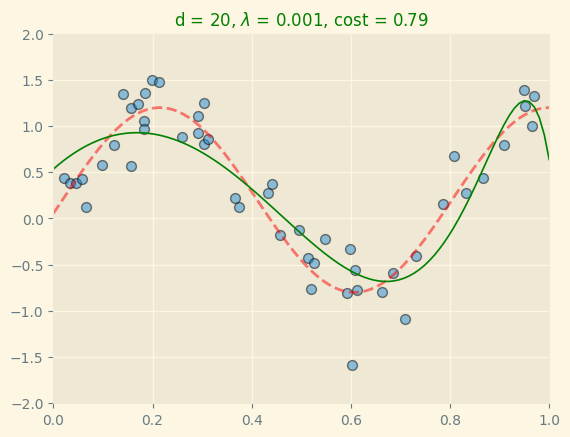

In [ ]:
degree = 20
lmbda = 1e-3
# fit
model = fit_poly_L1_reg(degree=degree, lmbda=lmbda)
scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error", cv=10)

# plot
fig, ax = plt.subplots(1)
x_test = np.linspace(0, 1, 100)
ax.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
ax.scatter(x, y, s=50, edgecolor='k', alpha=0.5, label="Samples")
ax.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
ax.set_xlim((0, 1))
ax.set_ylim((-2, 2))
ax.set_title("d = %d, $\lambda$ = %s, cost = %.2f" % (degree, lmbda, -scores.mean()), fontsize=12, color="green")
plt.show()

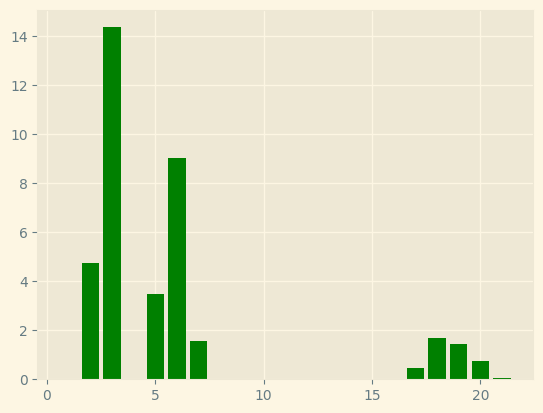

In [ ]:
plot_coef(model.steps[1][1].coef_)

In [ ]:
lmbdas = [1e-3, 1e-2, 1e-1]
degrees = [3, 10, 20]

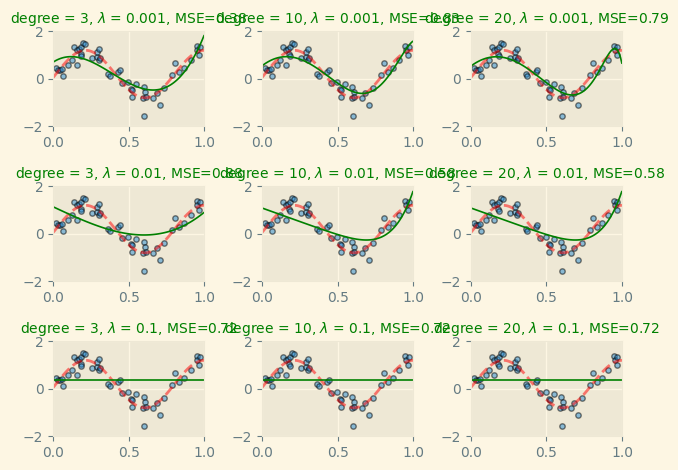

In [ ]:
plt.figure()

for lmbda in lmbdas:
  for d in degrees:
    model = fit_poly_L1_reg(degree=d, lmbda=lmbda)

    # plot data and model
    scores = cross_val_score(model, x[:, None], y, scoring="neg_mean_squared_error",  cv=10)

    # plot data model
    plt.subplot(3, 3, (3*(lmbdas.index(lmbda)))+degrees.index(d)+1)
    plt.tight_layout()
    x_test = np.linspace(0, 1, 100)
    plt.plot(x_test, f(x_test), 'r--', label="Target", alpha=0.5)
    plt.scatter(x, y, s=15, edgecolor='k',alpha=0.5, label="Samples")
    plt.plot(x_test, model.predict(x_test[:, None]), 'g', lw=1.2, label="Predicted")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.title("degree = {}, $\lambda$ = {}, MSE={:.2f}".format(d, lmbda, -scores.mean()), fontsize=10, color="green")

warnings.filterwarnings(action="ignore")
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

In [ ]:
pipeline = make_pipeline(PolynomialFeatures(), Ridge()) #Lasso()

In [ ]:
hyp_pars = {
    "polynomialfeatures__degree": [3, 4, 5, 6, 7, 8, 9, 10],
    "ridge__alpha": [1e-4, 1e-3, 1e-2, 0.1] # lasso__alpha"
}
gridsearch = GridSearchCV(pipeline, param_grid=hyp_pars, cv=10, scoring="neg_mean_squared_error")
gridsearch.fit(x[:, None], y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('ridge', Ridge())]),
             param_grid={'polynomialfeatures__degree': [3, 4, 5, 6, 7, 8, 9,
                                                        10],
                         'ridge__alpha': [0.0001, 0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [ ]:
best_model = gridsearch.best_estimator_
best_parameters = gridsearch.best_params_

In [ ]:
print(best_parameters)

{'polynomialfeatures__degree': 7, 'ridge__alpha': 0.0001}


In [ ]:
# Placeholder pipeline with 'regressor' step
pipeline = Pipeline([
    ('polynomialfeatures', PolynomialFeatures()),
    ('regressor', Ridge()) # Placeholder, will be swapped out by GridSearchCV
])

# Hyperparameters grid
hyp_pars = {
    'polynomialfeatures__degree': [3, 4, 5, 6, 7, 8, 9, 10],
    'regressor': [Ridge(), Lasso()],
    'regressor__alpha': [1e-4, 1e-3, 1e-2, 0.1]
}

gridsearch = GridSearchCV(pipeline, param_grid=hyp_pars, cv=10, scoring="neg_mean_squared_error")
gridsearch.fit(x[:, None], y)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('regressor', Ridge())]),
             param_grid={'polynomialfeatures__degree': [3, 4, 5, 6, 7, 8, 9,
                                                        10],
                         'regressor': [Ridge(alpha=0.0001), Lasso()],
                         'regressor__alpha': [0.0001, 0.001, 0.01, 0.1]},
             scoring='neg_mean_squared_error')

In [ ]:
best_model = gridsearch.best_estimator_
best_parameters = gridsearch.best_params_
print(best_parameters)

{'polynomialfeatures__degree': 7, 'regressor': Ridge(alpha=0.0001), 'regressor__alpha': 0.0001}


# Regularization in LogisticRegression

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn import datasets

In [ ]:
# Loading dataset
iris = datasets.load_iris()
X = iris.data[:, 0:2] # Only take the first two features
y = iris.target

In [ ]:
# Define regularization strengths to try
C_values = [0.01, 0.1, 1, 10, 100, 1000] # C=1/lambda

# Split data into training and test sets
np.random.seed(0)
indices = np.random.permutation(len(X))
X_train, y_train = X[indices[:-30]], y[indices[:-30]]
X_test, y_test = X[indices[-30:]], y[indices[-30:]]

Accuracy for C = 0.01: 0.533
Accuracy for C = 0.1: 0.633
Accuracy for C = 1: 0.667
Accuracy for C = 10: 0.800
Accuracy for C = 100: 0.833
Accuracy for C = 1000: 0.867


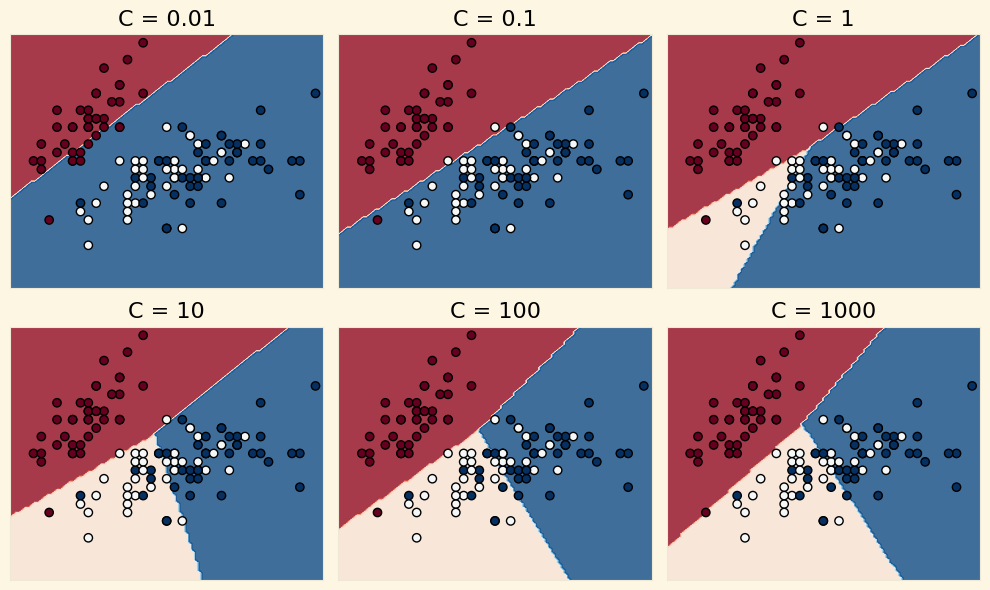

In [ ]:
# Fit models with different regularization
plt.figure(figsize=(10,6))
for i, C in enumerate(C_values):
  clf = LogisticRegression(penalty='l1', C=C, solver="liblinear")
  clf.fit(X_train, y_train)
  y_pred = clf.predict(X_test)
  accuracy = accuracy_score(y_test, y_pred)
  print("Accuracy for C = {}: {:.3f}".format(C, accuracy))

  # Plot decision boundry
  plt.subplot(2, 3, i+1)
  xx, yy = np.meshgrid(np.linspace(4, 8, 100), np.linspace(1.5, 4.5, 100))
  Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
  Z = Z.reshape(xx.shape)
  plt.contour(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
  plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.RdBu, edgecolors='black')
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.xticks(())
  plt.yticks(())
  plt.title("C = {}".format(C))

plt.tight_layout()
plt.show()

# Cross Validation

In [ ]:
from sklearn.model_selection import train_test_split, learning_curve
from sklearn.datasets import load_breast_cancer

In [ ]:
cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
X.shape, y.shape

((569, 30), (569,))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=42)

print('Train Data Shape: ', X_train.shape, y_train.shape)
print('Test Data Shape: ', X_test.shape, y_test.shape)

Train Data Shape:  (398, 30) (398,)
Test Data Shape:  (171, 30) (171,)


In [ ]:
clf = LogisticRegression()
clf.fit(X_train, y_train) #classifier

LogisticRegression()

In [ ]:
clf.coef_

array([[ 1.03,  0.49,  0.24, -0.02, -0.04,
        -0.18, -0.26, -0.11, -0.06, -0.01,
         0.03,  0.46,  0.07, -0.11, -0.  ,
        -0.04, -0.05, -0.01, -0.01, -0.  ,
         1.05, -0.55, -0.23, -0.01, -0.07,
        -0.55, -0.69, -0.2 , -0.19, -0.05]])

In [ ]:
clf.score(X_test, y_test)

0.9707602339181286

In [ ]:
from sklearn.model_selection import cross_val_score
clf = LogisticRegression(solver='lbfgs', max_iter=500)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)

[0.94 0.94 0.97 0.95 0.96]


In [ ]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))

Accuracy: 0.95 (+/- 0.01)


In [ ]:
# from sklearn import metrics
scores = cross_val_score(clf, X, y, cv=5, scoring='f1_macro')
scores

array([0.93, 0.93, 0.97, 0.94, 0.96])

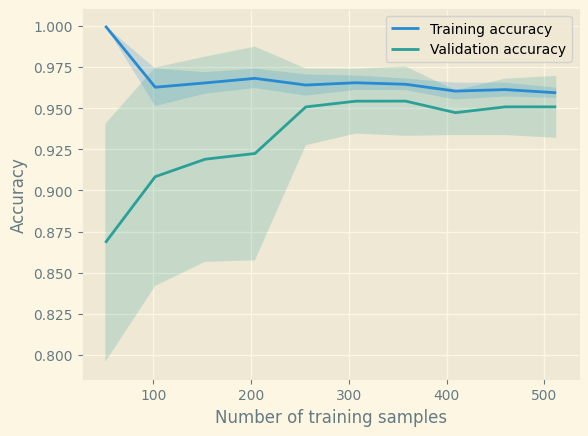

In [ ]:
# Plot the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, cv=10, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 10))
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
plt.plot(train_sizes, train_mean, label='Training accuracy')
plt.fill_between(train_sizes, train_mean - train_std,
                 train_mean + train_std, alpha=0.2)
plt.plot(train_sizes, test_mean, label='Validation accuracy')
plt.fill_between(train_sizes, test_mean - test_std,
                 test_mean + test_std, alpha=0.2)
plt.xlabel('Number of training samples')
plt.ylabel('Accuracy')
plt.legend(loc='best')
plt.show()

In [ ]:
from sklearn.model_selection import ShuffleSplit
n_samples = X.shape[0]
cv = ShuffleSplit(n_splits=3, test_size=0.3, random_state=42)
cross_val_score(clf, X, y, cv=cv)

array([0.96, 0.97, 0.96])

In [ ]:
from sklearn.model_selection import cross_val_predict
from sklearn import metrics

predicted = cross_val_predict(clf, X, y, cv=10)
metrics.accuracy_score(y, predicted)

0.9507908611599297

# Cross Validatoin Iterators

In [ ]:
from sklearn.linear_model import LassoCV

In [ ]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4, shuffle=True)
X = ["a", "b", "c", "d"]
for train, test in kf.split(X):
    print("%s %s" % (train, test))

[1 2 3] [0]
[0 1 3] [2]
[0 1 2] [3]
[0 2 3] [1]


In [ ]:
from sklearn.model_selection import StratifiedKFold
X = np.ones(20)
y = [0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
skf = StratifiedKFold(n_splits=3)
for train, test in skf.split(X, y):
    print("%s %s" % (train, test))

[ 2  3  9 10 11 12 13 14 15 16 17 18 19] [0 1 4 5 6 7 8]
[ 0  1  3  4  5  6  7  8 15 16 17 18 19] [ 2  9 10 11 12 13 14]
[ 0  1  2  4  5  6  7  8  9 10 11 12 13 14] [ 3 15 16 17 18 19]


# Grouped Data

In [ ]:
from sklearn.model_selection import GroupKFold
X = [0.1, 0.2, 2.2, 2.4, 2.3, 4.55, 5.8, 8.8, 9, 10]
y = ["a", "b", "b", "b", "c", "c", "c", "d", "d", "d"]
groups = [1, 1, 1, 2, 2, 2, 3, 3, 3, 3]

gkf = GroupKFold(n_splits=3)
for train, test in gkf.split(X, y, groups=groups):
    print("%s %s" % (train, test))

[0 1 2 3 4 5] [6 7 8 9]
[0 1 2 6 7 8 9] [3 4 5]
[3 4 5 6 7 8 9] [0 1 2]


# Time Series Split

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
X = np.array([[1, 2], [3, 4], [1, 2], [3, 4], [1, 2], [3, 4]])
y = np.array([1, 2, 3, 4, 5, 6])
tscv = TimeSeriesSplit(n_splits=3)
print(tscv)

for train, test in tscv.split(X):
    print("%s %s" % (train, test))

TimeSeriesSplit(gap=0, max_train_size=None, n_splits=3, test_size=None)
[0 1 2] [3]
[0 1 2 3] [4]
[0 1 2 3 4] [5]
